In [1]:
# subsample images from cifar10

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage 

(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

train_images_sub=np.zeros([250,32,32,3])
train_labels_sub=np.zeros([250,1])

test_images_sub=np.zeros([200,32,32,3])
test_labels_sub=np.zeros([200,1])

for clsi in range (10):
    idx=train_labels==clsi
    idx=np.squeeze(idx)
    imgs = train_images[idx,:,:,:]
    imgs = imgs[::200,:,:,:]
    train_images_sub[25*clsi:(clsi+1)*25,:,:,:] = imgs
    train_labels_sub[25*clsi:(clsi+1)*25,:] = clsi
    
    idx=test_labels==clsi
    idx=np.squeeze(idx)
    imgs = test_images[idx,:,:,:]
    imgs = imgs[::50,:,:,:]
    test_images_sub[20*clsi:(clsi+1)*20,:,:,:]=imgs
    test_labels_sub[20*clsi:(clsi+1)*20,:] = clsi
    

print("train_images shape:", train_images_sub.shape)
print("train_labels shape:", train_labels_sub.shape)
print("test_images shape:", test_images_sub.shape)
print("test_labels shape:", test_labels_sub.shape)



train_images shape: (250, 32, 32, 3)
train_labels shape: (250, 1)
test_images shape: (200, 32, 32, 3)
test_labels shape: (200, 1)


# CNN model


In [2]:
# load libraries
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D,Flatten, Concatenate


In [3]:
# build the cnn model

# module1
class Module1(tf.keras.Model):
    def __init__(self):
        super(Module1, self).__init__()
        self.conv2 = Conv2D(32, (1, 1), padding = "same", activation="relu")
        self.conv3 = Conv2D(32, (1, 1), padding = "same", activation="relu")
        self.conv4 = Conv2D(64, (3, 3), padding = "same", activation="relu")
        self.poo11 = MaxPooling2D((3, 3), strides = (1,1), padding = "same")
        self.conv5 = Conv2D(32, (1, 1), padding = "same", activation="relu")
        self.concat1 = Concatenate()
        
    def call(self, inp):
        conv2 = self.conv2(inp)
        conv3 = self.conv3(inp)
        conv4 = self.conv4(conv3)
        poo11 = self.poo11(inp)
        conv5 = self.conv5(poo11)
        concat1 = self.concat1([conv2, conv4, conv5])
        return concat1
        
# module2
class Module2(tf.keras.Model):
    def __init__(self):
        super(Module2, self).__init__()
        self.conv6 = Conv2D(64, (1, 1), padding = "same", activation="relu")
        self.conv7 = Conv2D(64, (1, 1), padding = "same", activation="relu")
        self.conv8 = Conv2D(128, (3, 3), padding = "same", activation="relu")
        self.pool2 = MaxPooling2D((3, 3), strides = (1,1), padding = "same")
        self.conv9 = Conv2D(64, (1, 1), padding = "same", activation="relu")
        self.concat2 = Concatenate()
        
    def call(self, inp):
        conv6 = self.conv6(inp)
        conv7 = self.conv7(inp)
        conv8 = self.conv8(conv7)
        pool2 = self.pool2(inp)
        conv9 = self.conv9(pool2)
        concat2 = self.concat2([conv6, conv8, conv9])
        return concat2
    
                        
# cnn model 
class CNN(tf.keras.Model):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = Conv2D(32, (5, 5), activation="relu")
        self.module1 = Module1()
        self.module2 = Module2()
        self.pool3 = MaxPooling2D((2, 2), strides = (2,2), padding = "same")
        self.flat1 = Flatten()
        self.fc1 = Dense(256, activation="relu")
        self.fc2 = Dense(10, activation="softmax")
        
    def call(self, inp):
        conv1 = self.conv1(inp)
        module1 = self.module1(conv1)
        module2 = self.module2(module1)
        pool3 = self.pool3(module2)
        flat1 = self.flat1(pool3)
        fc1 = self.fc1(flat1)  
        fc2 = self.fc2(fc1)       
        
        return fc2


In [4]:
# build cnn model and check the architecture
cnn = CNN()
cnn.build(input_shape = (None, 32, 32, 3))
cnn.summary()

Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  2432      
_________________________________________________________________
module1 (Module1)            multiple                  21664     
_________________________________________________________________
module2 (Module2)            multiple                  98624     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  12845312  
_________________________________________________________________
dense_1 (Dense)              multiple                  2570    

In [15]:
# compile model 
# for loss function, we use SparseCategoricalCrossentropy because labels are integers
cnn.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001), 
            loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics = ['accuracy'])


In [16]:
# training
history_cnn = cnn.fit(train_images_sub, train_labels_sub, epochs = 20, batch_size = 32,
                    validation_data = (test_images_sub, test_labels_sub ))

Epoch 1/20
8/8 [==============================] - 3s 337ms/step - loss: 689.0734 - accuracy: 0.0800 - val_loss: 287.2151 - val_accuracy: 0.1000
Epoch 2/20
8/8 [==============================] - 2s 292ms/step - loss: 132.0087 - accuracy: 0.1280 - val_loss: 31.7758 - val_accuracy: 0.1100
Epoch 3/20
8/8 [==============================] - 2s 303ms/step - loss: 12.3546 - accuracy: 0.1960 - val_loss: 7.1234 - val_accuracy: 0.1350
Epoch 4/20
8/8 [==============================] - 2s 289ms/step - loss: 4.3008 - accuracy: 0.1880 - val_loss: 3.2246 - val_accuracy: 0.1200
Epoch 5/20
8/8 [==============================] - 2s 293ms/step - loss: 1.9813 - accuracy: 0.3840 - val_loss: 2.7135 - val_accuracy: 0.1850
Epoch 6/20
8/8 [==============================] - 2s 287ms/step - loss: 1.4428 - accuracy: 0.5440 - val_loss: 2.3725 - val_accuracy: 0.2400
Epoch 7/20
8/8 [==============================] - 2s 290ms/step - loss: 0.9176 - accuracy: 0.7600 - val_loss: 2.4415 - val_accuracy: 0.2450
Epoch 8/20
8

Populating the interactive namespace from numpy and matplotlib


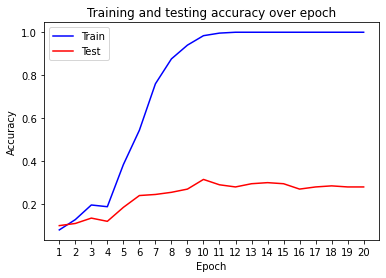

In [17]:
# plot learning curve
%pylab inline 

epochs = range(1,21,1)
plt.plot(epochs, history_cnn.history['accuracy'], label = 'Train', color = 'blue')
plt.plot(epochs, history_cnn.history['val_accuracy'], label = 'Test', color = 'red')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(epochs)
plt.title('Training and testing accuracy over epoch')
plt.legend()
plt.savefig('cnn.png',  dpi = 300)
plt.show()


# MLP model

In [18]:
# build the mlp model
mlp = keras.Sequential(
    [
        Input((32, 32, 3)),
        Flatten(),
        Dense(256, activation = 'relu'),
        Dense(10, activation = 'softmax')        
    ]
)

In [19]:
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 789,258
Trainable params: 789,258
Non-trainable params: 0
_________________________________________________________________


In [20]:
# compile the model
mlp.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001), 
            loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics = ['accuracy'])

In [21]:
# train the model
history_mlp = mlp.fit(train_images_sub, train_labels_sub, epochs = 20, batch_size = 32,
                    validation_data = (test_images_sub, test_labels_sub ))

Epoch 1/20
8/8 [==============================] - 0s 16ms/step - loss: 1178.1781 - accuracy: 0.1120 - val_loss: 1384.2393 - val_accuracy: 0.1000
Epoch 2/20
8/8 [==============================] - 0s 5ms/step - loss: 883.5045 - accuracy: 0.1040 - val_loss: 406.8145 - val_accuracy: 0.1350
Epoch 3/20
8/8 [==============================] - 0s 5ms/step - loss: 422.4966 - accuracy: 0.1480 - val_loss: 276.6114 - val_accuracy: 0.1450
Epoch 4/20
8/8 [==============================] - 0s 4ms/step - loss: 181.7305 - accuracy: 0.1720 - val_loss: 144.8133 - val_accuracy: 0.1650
Epoch 5/20
8/8 [==============================] - 0s 5ms/step - loss: 117.2567 - accuracy: 0.1880 - val_loss: 103.5193 - val_accuracy: 0.1600
Epoch 6/20
8/8 [==============================] - 0s 5ms/step - loss: 66.2331 - accuracy: 0.2120 - val_loss: 78.4029 - val_accuracy: 0.1600
Epoch 7/20
8/8 [==============================] - 0s 5ms/step - loss: 52.8604 - accuracy: 0.2440 - val_loss: 52.3956 - val_accuracy: 0.1200
Epoch 8

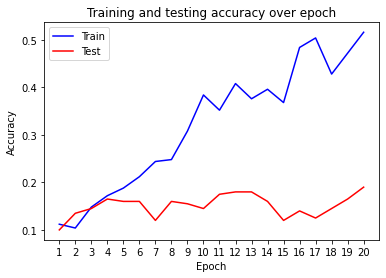

In [22]:
# plot the learning curve
plt.plot(epochs, history_mlp.history['accuracy'], label = 'Train', color = 'blue')
plt.plot(epochs, history_mlp.history['val_accuracy'], label = 'Test', color = 'red')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(epochs)
plt.title('Training and testing accuracy over epoch')
plt.legend()
plt.savefig('mlp.png',  dpi = 300)
plt.show()

# Feature extraction + MLP

In [5]:
# import model VGG19
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg_preprocess_input
from tensorflow.keras.models import Model
import numpy as np

# set the input size to be the size of the input image 
vgg19_model = VGG19(weights='imagenet', input_shape=[32,32,3],include_top=False) 

for idx in range(len(vgg19_model.layers)):
    print(vgg19_model.get_layer(index = idx).name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [55]:
# extract features from the last conv layer 'block5_conv4'
vgg19_model = Model(inputs=vgg19_model.input, outputs= vgg19_model.get_layer('block5_conv4').output)

vgg_x_tr = vgg_preprocess_input(train_images_sub)
vgg_x_ts = vgg_preprocess_input(test_images_sub)
vgg_tr_features = vgg19_model.predict(vgg_x_tr)   # features for training
vgg_ts_features = vgg19_model.predict(vgg_x_ts)   # features for test

In [60]:
# check the feature shape 
vgg_ts_features.shape

(200, 2, 2, 512)

In [66]:
# build the mlp model with the extracted feature size
mlp_vgg19 = keras.Sequential(
    [
        Input(vgg_ts_features.shape[1:]),
        Flatten(),
        Dense(256, activation = 'relu'),
        Dense(10, activation = 'softmax')        
    ]
)

In [63]:
mlp_vgg19.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               524544    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 527,114
Trainable params: 527,114
Non-trainable params: 0
_________________________________________________________________


In [67]:
# compile the model
mlp_vgg19.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001), 
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics = ['accuracy'])

# training 
history_mlp_vgg19 = mlp_vgg19.fit(vgg_tr_features, train_labels_sub, epochs = 20, batch_size = 32,
                    validation_data = (vgg_ts_features, test_labels_sub ))

Epoch 1/20
8/8 [==============================] - 0s 15ms/step - loss: 11.8941 - accuracy: 0.3120 - val_loss: 14.0641 - val_accuracy: 0.3500
Epoch 2/20
8/8 [==============================] - 0s 4ms/step - loss: 2.0634 - accuracy: 0.8200 - val_loss: 16.0154 - val_accuracy: 0.3600
Epoch 3/20
8/8 [==============================] - 0s 4ms/step - loss: 0.3806 - accuracy: 0.9520 - val_loss: 16.9515 - val_accuracy: 0.3850
Epoch 4/20
8/8 [==============================] - 0s 4ms/step - loss: 0.0379 - accuracy: 0.9880 - val_loss: 17.6812 - val_accuracy: 0.4000
Epoch 5/20
8/8 [==============================] - 0s 4ms/step - loss: 0.0369 - accuracy: 0.9920 - val_loss: 17.8051 - val_accuracy: 0.4150
Epoch 6/20
8/8 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 18.0109 - val_accuracy: 0.4000
Epoch 7/20
8/8 [==============================] - 0s 4ms/step - loss: 0.0142 - accuracy: 0.9960 - val_loss: 17.7507 - val_accuracy: 0.4150
Epoch 8/20
8/8 [=========

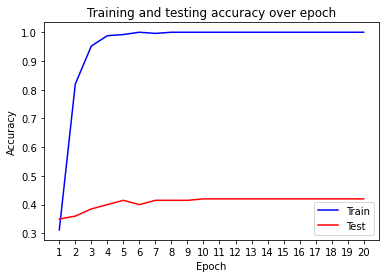

In [68]:
# plot the learning curve
plt.plot(epochs, history_mlp_vgg19.history['accuracy'], label = 'Train', color = 'blue')
plt.plot(epochs, history_mlp_vgg19.history['val_accuracy'], label = 'Test', color = 'red')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(epochs)
plt.title('Training and testing accuracy over epoch')
plt.legend()
plt.savefig('mlp_vgg19.png',  dpi = 300)
plt.show()

-----
Problem: too small extracted features 


Solution: resize the images into 224 x 224 (following)

-----

In [6]:
# resize the images
new_train_images_sub = tf.image.resize(train_images_sub, (224, 224))
new_test_images_sub = tf.image.resize(test_images_sub, (224, 224))
# check the image size
print('New image shape:', new_train_images_sub.shape)

# get the pre_trained model with default input size 224 x 224
vgg19_model = VGG19(weights='imagenet',include_top=False) 
vgg19_model = Model(inputs=vgg19_model.input, outputs= vgg19_model.get_layer('block5_conv4').output)

# get the features
vgg_x_tr = vgg_preprocess_input(new_train_images_sub)
vgg_x_ts = vgg_preprocess_input(new_test_images_sub)
vgg_tr_features = vgg19_model.predict(vgg_x_tr)   # features for training
vgg_ts_features = vgg19_model.predict(vgg_x_ts)
print('New feature shape:', vgg_tr_features.shape)

# build a model
mlp_vgg19 = keras.Sequential(
    [
        Input(vgg_ts_features.shape[1:]),
        Flatten(),
        Dense(256, activation = 'relu'),
        Dense(10, activation = 'softmax')        
    ]
)

# compile
mlp_vgg19.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001), 
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics = ['accuracy'])

# train
history_mlp_vgg19 = mlp_vgg19.fit(vgg_tr_features, train_labels_sub, epochs = 20, batch_size = 32,
                    validation_data = (vgg_ts_features, test_labels_sub ))

New image shape: (250, 224, 224, 3)
New feature shape: (250, 14, 14, 512)
Epoch 1/20
8/8 [==============================] - 1s 80ms/step - loss: 59.3316 - accuracy: 0.3320 - val_loss: 49.4504 - val_accuracy: 0.4900
Epoch 2/20
8/8 [==============================] - 0s 60ms/step - loss: 13.0960 - accuracy: 0.7880 - val_loss: 9.4931 - val_accuracy: 0.6100
Epoch 3/20
8/8 [==============================] - 0s 59ms/step - loss: 1.4045 - accuracy: 0.9200 - val_loss: 16.3450 - val_accuracy: 0.4600
Epoch 4/20
8/8 [==============================] - 0s 64ms/step - loss: 0.3732 - accuracy: 0.9680 - val_loss: 11.8466 - val_accuracy: 0.5200
Epoch 5/20
8/8 [==============================] - 0s 61ms/step - loss: 0.0662 - accuracy: 0.9840 - val_loss: 11.6587 - val_accuracy: 0.5650
Epoch 6/20
8/8 [==============================] - 0s 63ms/step - loss: 9.9076e-04 - accuracy: 1.0000 - val_loss: 11.2604 - val_accuracy: 0.5800
Epoch 7/20
8/8 [==============================] - 0s 62ms/step - loss: 2.2522e-05

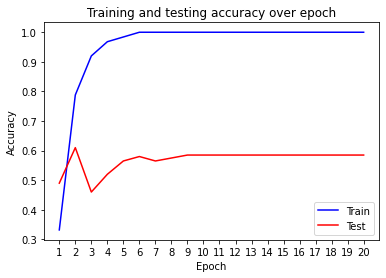

In [7]:
# plot the learning curve
plt.plot(epochs, history_mlp_vgg19.history['accuracy'], label = 'Train', color = 'blue')
plt.plot(epochs, history_mlp_vgg19.history['val_accuracy'], label = 'Test', color = 'red')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(epochs)
plt.title('Training and testing accuracy over epoch')
plt.legend()
plt.savefig('mlp_vgg19_rescaled.png',  dpi = 300)
plt.show()